In [4]:
import pandas as pd

In [5]:
users_df = pd.read_csv("data/Users.csv")
comments_df = pd.read_csv("data/Comments.csv")
postHistory_df = pd.read_csv("data/PostHistory.csv")
badges_df = pd.read_csv("data/Badges.csv")

# clean users_df
users_df.drop(["Location", "Views", "UpVotes", "WebsiteUrl", "EmailHash", "AboutMe", "DownVotes", "ProfileImageUrl"], inplace=True, axis=1)

# num posts
numPosts_df = postHistory_df.groupby("ParentId").size()

# add in numPosts to each user
for id, numPosts in numPosts_df.items():
    if id == "ParentId": continue
    id = int(id)
    users_df.loc[users_df["Id"] == id, "NumPosts"] = numPosts


In [6]:
postHistory_df.head(10)

,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,...,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate,ContentLicense
0,21213123,1,NaN,NaN,1390104887367,NaN,2,3872,<p>I am trying to see if there is any existing...,3211346,...,NaN,1421762290773,Websocket Reverse Tunnel,<websocket>,1,0,NaN,NaN,NaN,CC BY-SA 3.0
1,69898499,1,69901547,NaN,1636462366317,NaN,0,149,<p>I was implementing the fabric v2.2 Hyperled...,17367492,...,NaN,1636474629773,Error in executing ./network.sh up createChannel,<hyperledger-fabric><blockchain>,1,0,NaN,NaN,NaN,CC BY-SA 4.0
2,69908562,2,NaN,61454411,1636524191150,NaN,0,NaN,"<p>In my opinion, The problem is with the dire...",17367492,...,NaN,1636524191150,NaN,NaN,NaN,0,NaN,NaN,NaN,CC BY-SA 4.0
3,47460474,1,47467406,NaN,1511456687183,NaN,0,1394,<p>I am a beginner at Mongo and I made a data ...,7962699,...,NaN,1511504338687,A field with big array on mongodb,<arrays><mongodb><performance><mongoose><gridfs>,1,6,NaN,NaN,NaN,CC BY-SA 3.0
4,38387134,2,NaN,38376410,1468550881793,NaN,0,NaN,"<p>you should put your columns in [], e.g make...",6586437,...,NaN,1468550881793,NaN,NaN,NaN,0,NaN,NaN,NaN,CC BY-SA 3.0
5,3000031,2,NaN,2992731,1276020793713,NaN,1,NaN,"<p>Ok, I figured out what was happening and th...",360763,...,NaN,1276020793713,NaN,NaN,NaN,0,NaN,NaN,NaN,CC BY-SA 2.5
6,2992731,1,NaN,NaN,1275941062440,NaN,3,572,<p>I have an ajax-enabled WCF service that ret...,360763,...,NaN,1276020793713,Ajax-Enabled WCF Only Intermittently Returns t...,<ajax><wcf><callback>,2,1,NaN,NaN,NaN,CC BY-SA 2.5
7,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,...,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate,ContentLicense
8,73357338,2,NaN,73357013,1660542917850,NaN,-1,NaN,<p>Do you mean percentage of predicted labels ...,19759825,...,1660542939343,1660542939343,NaN,NaN,NaN,2,NaN,NaN,NaN,CC BY-SA 4.0
9,73357528,1,NaN,NaN,1660544838350,NaN,1,64,<p>There does not seem to be standardization o...,19759825,...,1660623065850,1660623065850,Any way to know what would work in all version...,<mysql><sql><sql-server>,0,6,NaN,NaN,NaN,CC BY-SA 4.0


In [7]:
reps = 0
for user in users_df.iterrows():
    reps += user[1]['Reputation']

avg_sample_rep = reps/users_df.shape[0]    

print(f"Average Sample Reputation: {round(avg_sample_rep, 2)}")

Average Sample Reputation: 66.01


In [8]:
len(users_df.index)

2486

In [9]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = users_df[["Reputation", "NumPosts"]].values


wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

ModuleNotFoundError: No module named 'sklearn'

/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


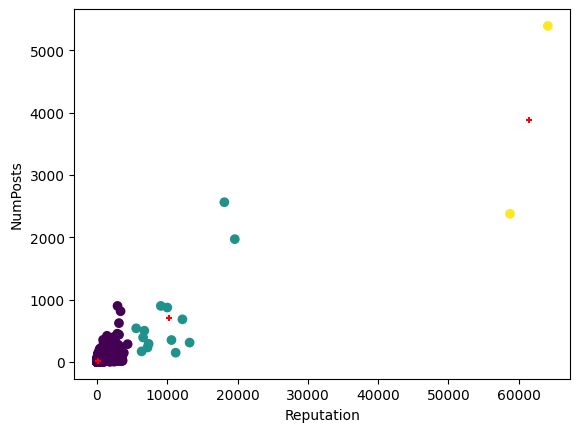

,Reputation,NumPosts
0,130.299114,16.471417
1,10270.428571,709.214286
2,61452.000000,3882.500000


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# k-means with reputation and numposts
data = users_df[['Reputation', 'NumPosts']].values

kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

labels = kmeans.labels_
users_df['Cluster'] = labels

labels = kmeans.labels_
centers = kmeans.cluster_centers_

# scatter plot dis bih
plt.scatter(data[:, 0], data[:, 1], c=labels)

# plot center of each group
plt.scatter(centers[:, 0], centers[:, 1], marker='+', s=25, color='red')

plt.xlabel('Reputation')
plt.ylabel('NumPosts')
plt.show()


analysis_df = pd.DataFrame(columns=["Reputation", "NumPosts"])

for label in set(labels):
    cluster = users_df[users_df['Cluster'] == label]
    new_row = pd.DataFrame([{'Reputation': cluster["Reputation"].mean(), 'NumPosts': cluster["NumPosts"].mean()}])
    analysis_df = pd.concat([analysis_df, new_row], ignore_index=True)

analysis_df.sort_values("Reputation", ascending=True).head(20)
